In [61]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Summary

In [68]:
df = pd.read_csv("processed_data/full_train_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

#compute registration info
df["registration_init_time"] = pd.to_datetime(df["registration_init_time"], format="%Y%m%d")
df["last_transaction_date"] = pd.to_datetime(df["last_transaction_date"], format="%Y-%m-%d")
df['registration_year'] = df['registration_init_time'].dt.year
df['registration_month'] = df['registration_init_time'].dt.month
df['last_transaction_year'] = df['last_transaction_date'].dt.year
df['last_transaction_month'] = df['last_transaction_date'].dt.month


In [69]:
df.head(5)

,msno,city,bd,gender,registered_via,registration_init_time,num_25_mean,num_50_mean,num_50_min,num_50_max,...,transaction_day_of_year_max,membership_expire_day_of_week_mean,membership_expire_month_mean,membership_expire_month_count,last_transaction_date,is_churn,registration_year,registration_month,last_transaction_year,last_transaction_month
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14,9.23,2.60,0.0,9.0,...,86.0,4.0,4.0,1.0,2017-03-27,0,2011,9,2017.0,3.0
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16,2.33,1.33,0.0,3.0,...,90.0,1.0,4.5,2.0,2017-03-31,0,2011,9,2017.0,3.0
2,vWYxNeXA8NwsiQQr7Beq5XQgCcj0y9N0YxEN2A2iqxI=,1,0,NaN,9,2014-10-21,5.43,1.87,0.0,11.0,...,89.0,5.0,4.0,1.0,2017-03-30,0,2014,10,2017.0,3.0
3,IGck5VyIyVm1OJT11BbjO+JzOsin6DhtMkKTs12LZA0=,13,30,male,7,2014-11-06,0.23,0.13,0.0,2.0,...,64.0,2.0,4.0,1.0,2017-03-05,0,2014,11,2017.0,3.0
4,LIjsD5QXX3eg/wT64IssfhBxwED2VTfQrewyvNNbCAQ=,22,24,female,9,2014-11-08,21.82,7.73,0.0,68.0,...,83.0,6.0,4.0,1.0,2017-03-24,0,2014,11,2017.0,3.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86042 entries, 0 to 86041
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   msno                                86042 non-null  object        
 1   city                                86042 non-null  int64         
 2   bd                                  86042 non-null  int64         
 3   gender                              39018 non-null  object        
 4   registered_via                      86042 non-null  int64         
 5   registration_init_time              86042 non-null  datetime64[ns]
 6   num_25_mean                         75401 non-null  float64       
 7   num_50_mean                         75401 non-null  float64       
 8   num_50_min                          75401 non-null  float64       
 9   num_50_max                          75401 non-null  float64       
 10  num_50_std            

In [71]:
df["is_churn"].mean()

0.09298947025871086

# Data Visualization

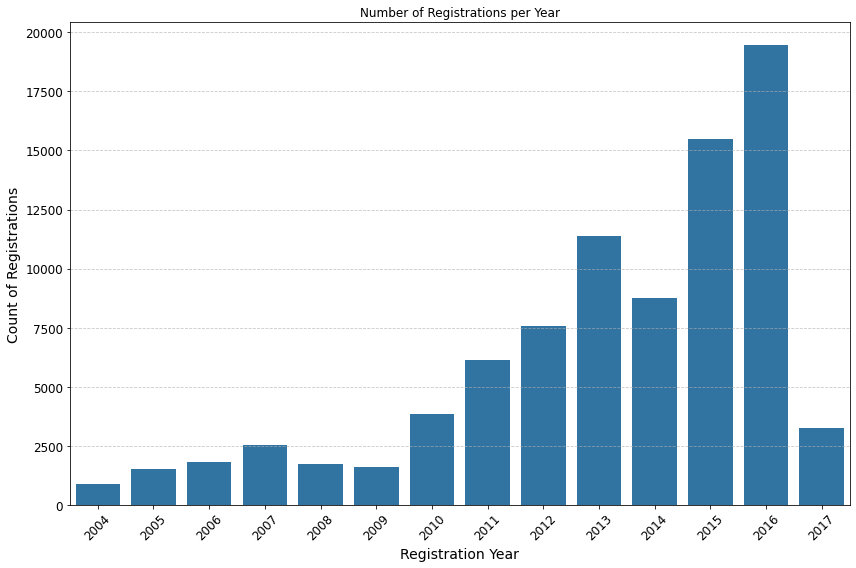

In [72]:
plt.figure(figsize=(12, 8))

reg_years_in_data = df.groupby("registration_year")["msno"].count().reset_index()
sns.barplot(x="registration_year", y="msno", data=reg_years_in_data)
plt.title('Number of Registrations per Year')
plt.xlabel('Registration Year', fontsize=14)
plt.ylabel('Count of Registrations', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)# Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

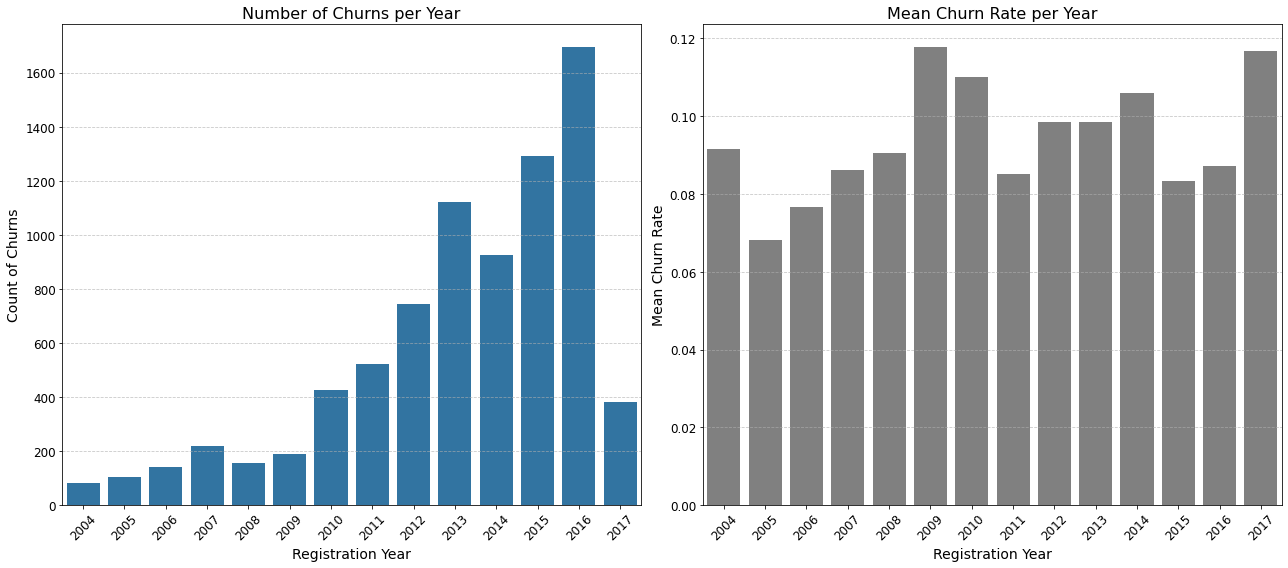

In [73]:
churn_counts = df.groupby("registration_year")["is_churn"].sum().reset_index()
churn_counts.columns = ["registration_year", "churn_count"]

# Mean churn rate per year
mean_churn_rate = df.groupby("registration_year")["is_churn"].mean().reset_index()
mean_churn_rate.columns = ["registration_year", "mean_churn_rate"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

# First plot: Number of churns per year
sns.barplot(ax=axes[0], x="registration_year", y="churn_count", data=churn_counts)
axes[0].set_title('Number of Churns per Year', fontsize=16)
axes[0].set_xlabel('Registration Year', fontsize=14)
axes[0].set_ylabel('Count of Churns', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Second plot: Mean churn rate per year
sns.barplot(ax=axes[1], x="registration_year", y="mean_churn_rate", data=mean_churn_rate, color='grey')
axes[1].set_title('Mean Churn Rate per Year', fontsize=16)
axes[1].set_xlabel('Registration Year', fontsize=14)
axes[1].set_ylabel('Mean Churn Rate', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
df["registration_init_time"].max()

Timestamp('2017-03-27 00:00:00')

**Observations**
1)  Most of people registred in 2013-2016 year
2)  The highest churn rate was in 2009 for some reason
3) 2017 has very small number of clients because our data includes only records untill April of 2017.

### Registration date

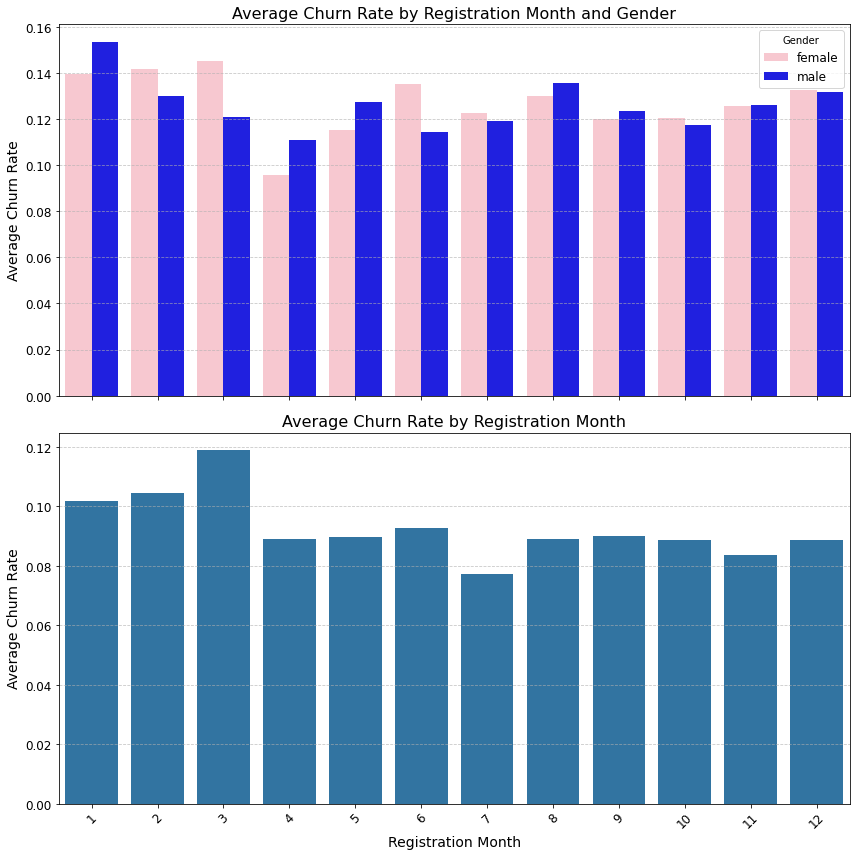

In [74]:
mean_churn_by_month_gender = df.groupby(['registration_month', 'gender'])['is_churn'].mean().reset_index()

cust_pallete =  {'female': 'pink', 'male': 'blue'}

# Create subplots with two rows
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# First plot: With gender hue
sns.barplot(ax=axes[0], x='registration_month', y='is_churn', hue='gender', data=mean_churn_by_month_gender, palette=cust_pallete)
axes[0].set_title('Average Churn Rate by Registration Month and Gender', fontsize=16)
axes[0].set_xlabel('')  # Remove x-axis label to avoid repetition
axes[0].set_ylabel('Average Churn Rate', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Gender', fontsize=12)

# Calculate the mean churn rate by registration month without gender separation
mean_churn_by_month = df.groupby('registration_month')['is_churn'].mean().reset_index()

# Second plot: Without gender hue
sns.barplot(ax=axes[1], x='registration_month', y='is_churn', data=mean_churn_by_month)
axes[1].set_title('Average Churn Rate by Registration Month', fontsize=16)
axes[1].set_xlabel('Registration Month', fontsize=14)
axes[1].set_ylabel('Average Churn Rate', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

### Last Transaction date

In [100]:
df['actual_amount_paid_sum'].mean()

183.22992616660403

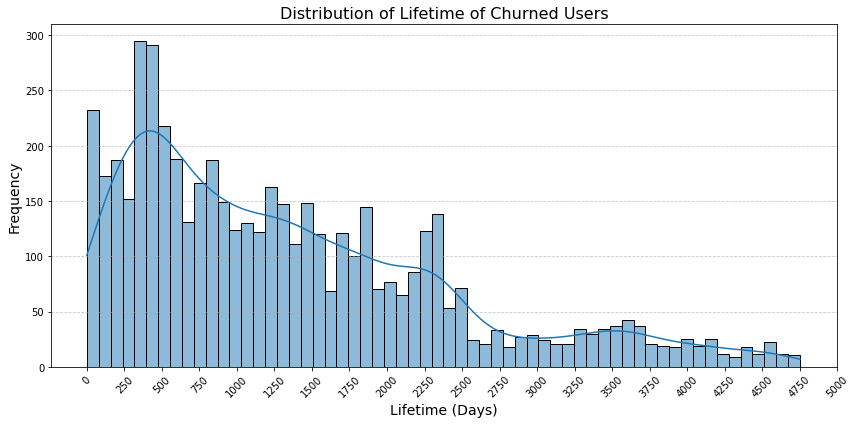

In [103]:
churned_df = df[df["is_churn"] == 1]

life_time_of_churned_users = (churned_df["last_transaction_date"] - churned_df["registration_init_time"]).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(life_time_of_churned_users, bins=60, kde=True)
plt.title('Distribution of Lifetime of Churned Users', fontsize=16)
plt.xlabel('Lifetime (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(np.linspace(0, 5000, 21), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can see that for people registered at March, churn rate goes up for some reason. It is about 12% whereas on average it is 

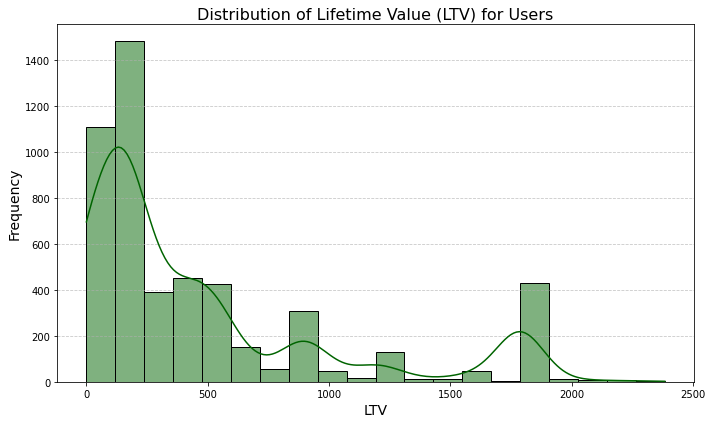

In [124]:
ltv_for_users = churned_df["actual_amount_paid_sum"] * (1 - churned_df["is_cancel_mean"])
ltv_for_users_filt = ltv_for_users[ltv_for_users < ltv_for_users.quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(ltv_for_users_filt, bins=20, color='darkgreen', kde=True)
plt.title('Distribution of Lifetime Value (LTV) for Users', fontsize=16)
plt.xlabel('LTV', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [126]:
ltv_for_churned_users.quantile([0.2, 0.5, 0.6, 0.7, 0.9, 0.95, 0.99, 0.995])

0.200      99.0
0.500     258.0
0.600     387.0
0.700     536.0
0.900    1788.0
0.950    1788.0
0.990    2400.0
0.995    2980.0
dtype: float64